In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec
import warnings
import missingno
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('D:\mr\Online Retail.xlsx' ,encoding='utf-8')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
# InvoiceNo', 账单号，分配给每笔交易的唯一编号
# 'StockCode', 商品的代码
# 'Description', 商品的描述
# 'Quantity', 每笔交易每种商品的数量
# 'InvoiceDate',每笔交易的日期
# 'UnitPrice', 价格
# 'CustomerID', 消费者编号。分配给每一个消费者的唯一编号
# 'Country'国家

In [8]:
df.shape

(541909, 8)

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

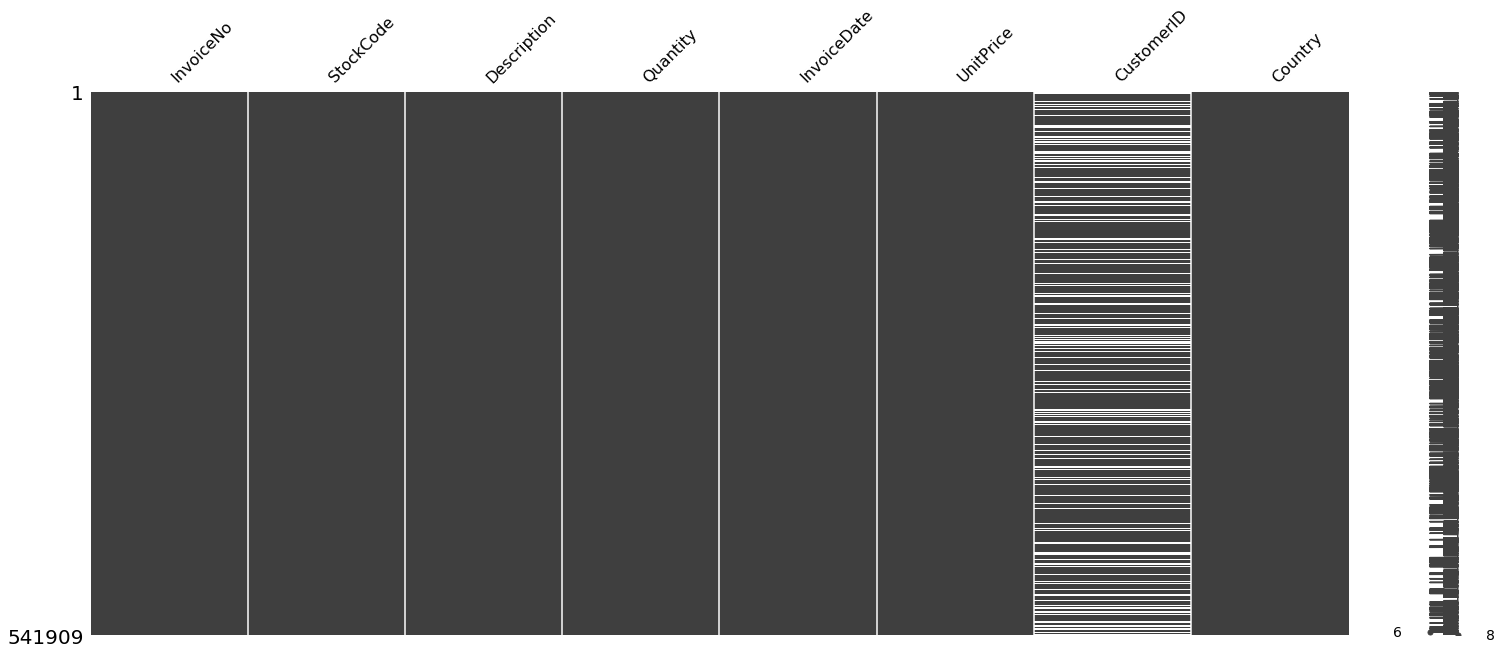

In [11]:
missingno.matrix(df)

In [50]:
#df[df.isnull().values==True]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [15]:
df['StockCode'] = df.StockCode.astype(str)

In [16]:
#看一下总共有多少个消费者
customers = df.CustomerID.unique().tolist()

In [17]:
#将数据分割成1:9
#打乱消费者id
random.shuffle(customers)
#提取%90的消费者
customers_train = [customers[i] for i in range(round(0.9 * len(customers)))]

#分为测试集和训练集
train_df = df[df.CustomerID.isin(customers_train)]
test_df = df[~df.CustomerID.isin(customers_train)]

In [18]:
#将在数据集中为训练集和验证集创建消费者购买的序列

In [19]:
#存储消费者的历史
purchases_train = []
for i in tqdm(customers_train):
    #用商品列表填充列表
    temp = train_df[train_df.CustomerID == i]["StockCode"].tolist()
    purchases_train.append(temp)
# 存储消费者的购买历史
purchases_val = []
# 用商品代码填充列表
for i in tqdm(test_df['CustomerID'].unique()):
    temp = test_df[test_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_val.append(temp)

100%|██████████████████████████████████████████████████████████████████████████████| 437/437 [00:00<00:00, 1510.71it/s]


In [55]:
#构建word2vec

In [20]:
#训练Word2vec
model = Word2Vec(window = 10, sg = 1, hs = 0,
negative = 10, # for negative sampling
alpha=0.03, min_alpha=0.0007,
seed = 14)


0

In [21]:
model.build_vocab(purchases_train,progress_per=200)
model.train(purchases_train,total_examples=model.corpus_count,epochs=10 ,report_delay=1)

(3613338, 3650580)

In [22]:
#因为我们不打算进一步训练模型，所以我们在这里调用init_sims()。这将使模型的内存效率更高:
model.init_sims(replace=True)

In [23]:
print(model)

Word2Vec(vocab=3164, size=100, alpha=0.03)


In [24]:
x = model[model.wv.vocab]
print(x)

[[ 0.02190457 -0.04809377  0.11380713 ... -0.02021605 -0.10473676
  -0.11122163]
 [-0.02042397  0.08106526  0.01668413 ... -0.0753101   0.21171248
  -0.12881897]
 [-0.11839431 -0.18162364  0.00857946 ...  0.04739951  0.00302798
   0.08682857]
 ...
 [-0.07328934  0.00945811  0.07973362 ... -0.08618595 -0.0584705
  -0.00277081]
 [-0.17223777 -0.11222561 -0.16132118 ... -0.0219084  -0.09660339
  -0.06489206]
 [ 0.02703689 -0.09813074  0.23526369 ...  0.1325922  -0.0905362
  -0.07227562]]


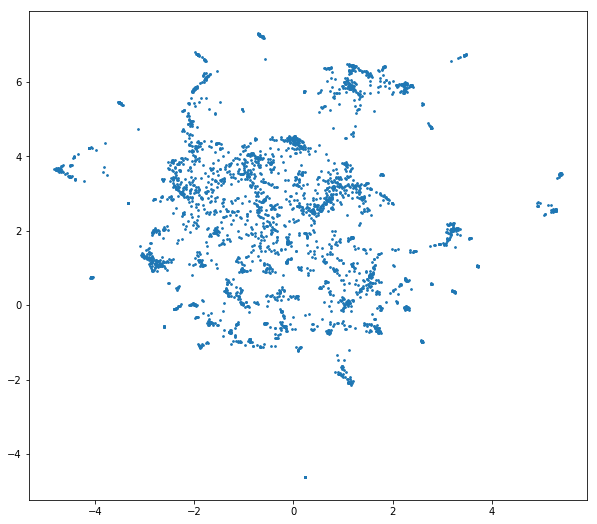

In [25]:
import umap
cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
n_components=2, random_state=42).fit_transform(x)
plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [26]:
#开始推荐商品

In [27]:
products = train_df[["StockCode", "Description"]]
# 去重
products.drop_duplicates(inplace=True, subset='StockCode', keep="last")
# 创建一个商品id和商品描述的字典
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

In [28]:
products_dict['84029E']

['RED WOOLLY HOTTIE WHITE HEART.']

In [32]:
products_dict['90018A']

['SILVER M.O.P ORBIT DROP EARRINGS']

In [35]:
ms = model.similar_by_vector(model['90019A'])[1:]
ms

[('90018A', 0.7636033296585083),
 ('90160D', 0.7512990832328796),
 ('90120B', 0.7402127981185913),
 ('90123A', 0.7402055263519287),
 ('90175C', 0.7379810810089111),
 ('90161A', 0.7296504974365234),
 ('90183A', 0.7132898569107056),
 ('90177D', 0.7029533386230469),
 ('90162C', 0.7026422023773193)]

In [51]:
products_dict[ms[4][0]][0]

'BLUE GLASS CHUNKY CHARM BRACELET'

In [52]:
new_ms =[]
def similar_by_product(product,topn):
    #为输入的商品找出最相似的商品列表
    vctor = model.similar_by_vector(model['90019A'] ,topn=topn+1)[1:]
    #提取相似产品的名称和相似度评分
    for i in vctor:
        description = ( i[0],products_dict[i[0]][0] ,i[1])
        new_ms.append(description)
    return new_ms


In [53]:
similar_by_product(model['90019A'] ,6)

[('90018A', 'SILVER M.O.P ORBIT DROP EARRINGS', 0.7636033296585083),
 ('90160D', 'PINK BOUDICCA LARGE BRACELET', 0.7512990832328796),
 ('90120B', 'BLUE MURANO TWIST BRACELET', 0.7402127981185913),
 ('90123A', 'PINK HEART OF GLASS BRACELET', 0.7402055263519287),
 ('90175C', 'BLUE GLASS CHUNKY CHARM BRACELET', 0.7379810810089111),
 ('90161A', 'ANT COPPER RED BOUDICCA BRACELET', 0.7296504974365234)]

In [ ]:
# 太酷了!结果还是非常相关，并且与输入商品匹配得很好。然而，这个输出仅基于单个商品的向量。如果我们想根据他或她过去的多次购买来推荐商品呢?

# 一个简单的解决方案是取用户迄今为止购买的所有商品的向量的平均值，并使用这个结果向量找到类似的商品。
# 我们将使用下面的函数，它接收一个商品id列表，并返回一个100维的向量，它是输入列表中商品的向量的平均值:

In [62]:
def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model[i])
        except KeyError:
            continue
    return np.mean(product_vec, axis=0)

In [63]:

len(purchases_val[0])

585

In [64]:
aggregate_vectors(purchases_val[0]).shape

(100,)

In [66]:

similar_by_product(aggregate_vectors(purchases_val[0]) ,topn=6)

[('90018A', 'SILVER M.O.P ORBIT DROP EARRINGS', 0.7636033296585083),
 ('90160D', 'PINK BOUDICCA LARGE BRACELET', 0.7512990832328796),
 ('90120B', 'BLUE MURANO TWIST BRACELET', 0.7402127981185913),
 ('90123A', 'PINK HEART OF GLASS BRACELET', 0.7402055263519287),
 ('90175C', 'BLUE GLASS CHUNKY CHARM BRACELET', 0.7379810810089111),
 ('90161A', 'ANT COPPER RED BOUDICCA BRACELET', 0.7296504974365234),
 ('90018A', 'SILVER M.O.P ORBIT DROP EARRINGS', 0.7636033296585083),
 ('90160D', 'PINK BOUDICCA LARGE BRACELET', 0.7512990832328796),
 ('90120B', 'BLUE MURANO TWIST BRACELET', 0.7402127981185913),
 ('90123A', 'PINK HEART OF GLASS BRACELET', 0.7402055263519287),
 ('90175C', 'BLUE GLASS CHUNKY CHARM BRACELET', 0.7379810810089111),
 ('90161A', 'ANT COPPER RED BOUDICCA BRACELET', 0.7296504974365234)]

In [67]:
similar_by_product(aggregate_vectors(purchases_val[0][-10:]) ,topn=6)

[('90018A', 'SILVER M.O.P ORBIT DROP EARRINGS', 0.7636033296585083),
 ('90160D', 'PINK BOUDICCA LARGE BRACELET', 0.7512990832328796),
 ('90120B', 'BLUE MURANO TWIST BRACELET', 0.7402127981185913),
 ('90123A', 'PINK HEART OF GLASS BRACELET', 0.7402055263519287),
 ('90175C', 'BLUE GLASS CHUNKY CHARM BRACELET', 0.7379810810089111),
 ('90161A', 'ANT COPPER RED BOUDICCA BRACELET', 0.7296504974365234),
 ('90018A', 'SILVER M.O.P ORBIT DROP EARRINGS', 0.7636033296585083),
 ('90160D', 'PINK BOUDICCA LARGE BRACELET', 0.7512990832328796),
 ('90120B', 'BLUE MURANO TWIST BRACELET', 0.7402127981185913),
 ('90123A', 'PINK HEART OF GLASS BRACELET', 0.7402055263519287),
 ('90175C', 'BLUE GLASS CHUNKY CHARM BRACELET', 0.7379810810089111),
 ('90161A', 'ANT COPPER RED BOUDICCA BRACELET', 0.7296504974365234),
 ('90018A', 'SILVER M.O.P ORBIT DROP EARRINGS', 0.7636033296585083),
 ('90160D', 'PINK BOUDICCA LARGE BRACELET', 0.7512990832328796),
 ('90120B', 'BLUE MURANO TWIST BRACELET', 0.7402127981185913),
 ('